# Loading the necessary modules

In [1]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, accuracy_score, roc_curve
from sklearn.model_selection import train_test_split, StratifiedKFold

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Loading the data:
## (Rows with NA's and features with too many missing values have been removed already)

In [2]:
os.getcwd()

'C:\\Users\\Aritra\\OneDrive\\Desktop\\Research\\Work with Ansu Da\\R-codes\\Neural Network Analysis'

In [3]:
data_full = pd.read_csv('../B3_working.csv', low_memory = False)

In [4]:
data_full.shape

(7775, 1190)

# Scaling the design matrix and transforming the response
Here we simply use the min-max scaler and we change the response to 0 and 1 (0 for the class BBB+ and 1 for the class BBB-)

In [5]:
X = np.array(data_full.drop(labels = 'y', axis = 1))
y = data_full['y']
y_binary = np.zeros(len(y))
y_binary[y == 'BBB+'] = 1
print(X.shape)
print(y.shape)
print(y_binary.shape)

(7775, 1189)
(7775,)
(7775,)


In [6]:
rs = 42
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, train_size = 0.9, random_state = rs,
                                                   stratify=y_binary)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6997, 1189)
(6997,)
(778, 1189)
(778,)


In [7]:
print(y_test.mean())
print(y_train.mean())

0.6349614395886889
0.6344147491782193


# Making Neural Network model with only 2 hidden layers
Here for the last layer we have used the usual sigmoid function to get the corresponding class probabilites

In [153]:
nn_model = MLPClassifier(hidden_layer_sizes= (128,32),
                        activation = 'logistic',
                        solver = 'adam')
nn_model.n_outputs_ = 1
nn_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(128, 32))

In [158]:
nn_model.n_outputs_

1

In [159]:
nn_model.predict_proba(X_test)

array([[0.37100802, 0.62899198],
       [0.37100802, 0.62899198],
       [0.37100802, 0.62899198],
       ...,
       [0.37100802, 0.62899198],
       [0.37100802, 0.62899198],
       [0.37100802, 0.62899198]])

In [160]:
mask = nn_model.predict(X_test)==0
nn_model.predict_proba(X_test)[mask]

array([[0.50617617, 0.49382383]])

In [75]:
# nn_model = tf.keras.Sequential()
# nn_model.add(Dense(128, activation = 'relu'))
# nn_model.add(Dense(32, activation = 'relu'))
# nn_model.add(Dense(1, activation = 'sigmoid'))

# nn_model.compile(
#     optimizer = 'Adam',
#     loss =  BinaryCrossentropy(),
#     metrics = ['accuracy']
# )

In [77]:
# nn_model.fit(X_train, y_train, epochs = 50, validation_data = (X_test, y_test), verbose = 0)

In [82]:
# nn_model.summary()

array([1, 0])

In [131]:
from sklearn.neural_network import MLPClassifier
nn_model = MLPClassifier(hidden_layer_sizes= (128,32),
                        activation = 'logistic',
                        solver = 'adam')
nn_model.n_outputs_ = 1

In [132]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, make_scorer
from tqdm import tqdm


skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state=rs)

def custom_fscore(y_true, y_pred_prob, thresh):
    preds = (y_pred_prob>1-thresh).astype(int)
    f = f1_score(y_true, preds)
    return f

custom_scorer = make_scorer(custom_fscore, greater_is_better=True, needs_proba=True, thresh = 0.5)

In [145]:
thresh_vals = np.arange(0.1,0.91,0.01)
# nn = NN()
f_scores = [cross_val_score(nn_model, X_train, y_train, cv = skf, scoring = make_scorer(custom_fscore, greater_is_better=True, needs_proba=True, thresh = th),
                           verbose=1, n_jobs = -1) for th in thresh_vals]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   10.1s remaining:   15.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   16.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   10.4s remaining:   15.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   14.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   14.4s remaining:   21.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   21.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   10.2s remaining:   15.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   16.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   11.4s remaining:   17.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   16.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   11.1s remaining:   16.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   16.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    9.6s remaining:   14.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   16.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   10.4s remaining:   15.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   12.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   10.3s remaining:   15.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   19.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   11.1s remaining:   16.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   16.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   13.4s remaining:   20.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   15.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   10.4s remaining:   15.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   16.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_

In [147]:
f_scores = np.array(f_scores)
f_vals = f_scores.mean(axis=1)

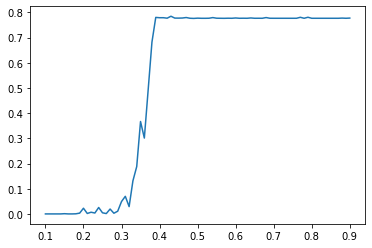

In [148]:
plt.plot(thresh_vals, f_vals)

In [9]:
nn_model = Sequential()
nn_model.add(Dense(128, activation = 'relu'))
nn_model.add(Dense(32, activation = 'relu'))
nn_model.add(Dense(1, activation = 'sigmoid'))

nn_model.compile(
    optimizer = 'Adam',
    loss =  BinaryCrossentropy(),
    metrics = ['accuracy']
)

In [10]:
rs = 42
f_vec = []
thresh = 0.5
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = rs)
for train_id, test_id in tqdm(skf.split(X_train, y_train)):
    X_train_k, X_test_k = X_train[train_id], X_train[test_id]
    y_train_k, y_test_k = y_train[train_id], y_train[test_id]

    nn_model.fit(X_train_k, y_train_k, epochs = 20, verbose = 0)
    probs = nn_model.predict(X_test_k)
    preds = (probs>1-thresh).astype(int)

    f_vec.append(f1_score(y_test_k, preds))

f_vec=np.array(f_vec)
f_vec.mean()

0it [00:00, ?it/s]

44/44 [==============================] - 7s 2ms/step


1it [00:28, 28.90s/it]

44/44 [==============================] - 6s 2ms/step


2it [00:51, 25.46s/it]

44/44 [==============================] - 6s 2ms/step


3it [01:15, 24.55s/it]

44/44 [==============================] - 6s 3ms/step


4it [01:38, 23.89s/it]

44/44 [==============================] - 6s 3ms/step


5it [02:01, 24.28s/it]


0.7866314078878341

In [11]:
def kcv_metric(thresh):
    rs = 42
    f_vec = []
    skf = StratifiedKFold(n_splits = 5, shuffle = True,random_state = rs)
    for train_id, test_id in tqdm(skf.split(X_train, y_train)):
        X_train_k, X_test_k = X_train[train_id], X_train[test_id]
        y_train_k, y_test_k = y_train[train_id], y_train[test_id]

        nn_model.fit(X_train_k, y_train_k, epochs = 20, verbose = 0)
        probs = nn_model.predict(X_test_k)
        preds = (probs>1-thresh).astype(int)

        f_vec.append(f1_score(y_test_k, preds))

    f_vec=np.array(f_vec)
    return f_vec.mean()

In [12]:
thresh_vals = np.arange(0.1,0.91,0.05)
print(len(thresh_vals))

17


In [13]:
res = [kcv_metric(t) for t in thresh_vals]

0it [00:00, ?it/s]

44/44 [==============================] - 6s 2ms/step


1it [00:22, 22.40s/it]

44/44 [==============================] - 6s 2ms/step


2it [00:45, 22.76s/it]

44/44 [==============================] - 6s 2ms/step


3it [01:08, 22.91s/it]

44/44 [==============================] - 6s 2ms/step


4it [01:31, 22.98s/it]

44/44 [==============================] - 6s 2ms/step


5it [01:55, 23.11s/it]
0it [00:00, ?it/s]

44/44 [==============================] - 6s 2ms/step


1it [00:21, 21.93s/it]

44/44 [==============================] - 6s 2ms/step


2it [00:44, 22.24s/it]

44/44 [==============================] - 6s 2ms/step


3it [01:07, 22.45s/it]

44/44 [==============================] - 6s 3ms/step


4it [01:29, 22.54s/it]

44/44 [==============================] - 6s 2ms/step


5it [01:53, 22.61s/it]
0it [00:00, ?it/s]

44/44 [==============================] - 6s 2ms/step


1it [00:23, 23.07s/it]

44/44 [==============================] - 6s 2ms/step


2it [00:47, 24.02s/it]

44/44 [==============================] - 6s 2ms/step


3it [01:12, 24.14s/it]

44/44 [==============================] - 6s 2ms/step


4it [01:36, 24.29s/it]

44/44 [==============================] - 6s 3ms/step


5it [02:01, 24.25s/it]
0it [00:00, ?it/s]

44/44 [==============================] - 6s 2ms/step


1it [00:23, 23.84s/it]

44/44 [==============================] - 6s 2ms/step


2it [00:47, 23.70s/it]

44/44 [==============================] - 6s 2ms/step


3it [01:10, 23.20s/it]

44/44 [==============================] - 6s 2ms/step


4it [01:32, 22.80s/it]

44/44 [==============================] - 6s 2ms/step


5it [01:54, 23.00s/it]
0it [00:00, ?it/s]

44/44 [==============================] - 6s 3ms/step


1it [00:22, 22.42s/it]

44/44 [==============================] - 6s 3ms/step


2it [00:44, 22.35s/it]

44/44 [==============================] - 6s 2ms/step


3it [01:07, 22.66s/it]

44/44 [==============================] - 6s 2ms/step


4it [01:30, 22.53s/it]

44/44 [==============================] - 6s 2ms/step


5it [01:53, 22.63s/it]
0it [00:00, ?it/s]

44/44 [==============================] - 6s 2ms/step


1it [00:23, 23.07s/it]

44/44 [==============================] - 6s 2ms/step


2it [00:46, 23.24s/it]

44/44 [==============================] - 6s 2ms/step


3it [01:08, 22.88s/it]

44/44 [==============================] - 6s 2ms/step


4it [01:31, 22.83s/it]

44/44 [==============================] - 6s 2ms/step


5it [01:54, 22.84s/it]
0it [00:00, ?it/s]

44/44 [==============================] - 6s 2ms/step


1it [00:22, 22.70s/it]

44/44 [==============================] - 6s 2ms/step


2it [00:46, 23.44s/it]

44/44 [==============================] - 7s 3ms/step


3it [01:15, 25.95s/it]

44/44 [==============================] - 6s 2ms/step


4it [01:39, 25.34s/it]

44/44 [==============================] - 6s 2ms/step


5it [02:03, 24.75s/it]
0it [00:00, ?it/s]

44/44 [==============================] - 6s 2ms/step


1it [00:23, 23.35s/it]

44/44 [==============================] - 6s 2ms/step


2it [00:45, 22.72s/it]

44/44 [==============================] - 6s 2ms/step


3it [01:09, 23.13s/it]

44/44 [==============================] - 6s 2ms/step


4it [01:33, 23.44s/it]

44/44 [==============================] - 6s 2ms/step


5it [01:56, 23.23s/it]
0it [00:00, ?it/s]

44/44 [==============================] - 8s 2ms/step


1it [00:24, 24.14s/it]

44/44 [==============================] - 6s 5ms/step


2it [00:52, 26.74s/it]

44/44 [==============================] - 11s 4ms/step


3it [01:26, 30.14s/it]

44/44 [==============================] - 7s 2ms/step


4it [01:55, 29.73s/it]

44/44 [==============================] - 6s 2ms/step


5it [02:18, 27.76s/it]
0it [00:00, ?it/s]

44/44 [==============================] - 6s 2ms/step


1it [00:21, 21.99s/it]

44/44 [==============================] - 6s 3ms/step


2it [00:44, 22.22s/it]

44/44 [==============================] - 6s 2ms/step


3it [01:06, 22.25s/it]

44/44 [==============================] - 5s 2ms/step


4it [01:29, 22.38s/it]

44/44 [==============================] - 6s 2ms/step


5it [01:51, 22.36s/it]
0it [00:00, ?it/s]

44/44 [==============================] - 5s 3ms/step


1it [00:20, 20.59s/it]

44/44 [==============================] - 5s 2ms/step


2it [00:43, 21.68s/it]

44/44 [==============================] - 6s 3ms/step


3it [01:06, 22.70s/it]

44/44 [==============================] - 6s 2ms/step


4it [01:30, 23.01s/it]

44/44 [==============================] - 6s 3ms/step


5it [01:53, 22.76s/it]
0it [00:00, ?it/s]

44/44 [==============================] - 6s 3ms/step


1it [00:22, 22.15s/it]

44/44 [==============================] - 6s 2ms/step


2it [00:45, 22.70s/it]

44/44 [==============================] - 5s 2ms/step


3it [01:06, 21.93s/it]

44/44 [==============================] - 6s 2ms/step


4it [01:27, 21.78s/it]

44/44 [==============================] - 6s 2ms/step


5it [01:49, 21.96s/it]
0it [00:00, ?it/s]

44/44 [==============================] - 6s 2ms/step


1it [00:22, 22.56s/it]

44/44 [==============================] - 6s 2ms/step


2it [00:45, 23.06s/it]

44/44 [==============================] - 6s 2ms/step


3it [01:09, 23.18s/it]

44/44 [==============================] - 6s 3ms/step


4it [01:32, 23.33s/it]

44/44 [==============================] - 6s 2ms/step


5it [01:56, 23.35s/it]
0it [00:00, ?it/s]

44/44 [==============================] - 6s 2ms/step


1it [00:23, 23.14s/it]

44/44 [==============================] - 6s 2ms/step


2it [00:46, 23.29s/it]

44/44 [==============================] - 6s 2ms/step


3it [01:08, 22.76s/it]

44/44 [==============================] - 6s 2ms/step


4it [01:31, 22.72s/it]

44/44 [==============================] - 6s 2ms/step


5it [01:53, 22.69s/it]
0it [00:00, ?it/s]

44/44 [==============================] - 6s 2ms/step


1it [00:21, 21.90s/it]

44/44 [==============================] - 6s 2ms/step


2it [00:44, 22.21s/it]

44/44 [==============================] - 6s 2ms/step


3it [01:06, 21.98s/it]

44/44 [==============================] - 6s 2ms/step


4it [01:28, 22.22s/it]

44/44 [==============================] - 6s 2ms/step


5it [01:50, 22.16s/it]
0it [00:00, ?it/s]

44/44 [==============================] - 5s 2ms/step


1it [00:21, 21.86s/it]

44/44 [==============================] - 6s 2ms/step


2it [00:44, 22.14s/it]

44/44 [==============================] - 5s 2ms/step


3it [01:06, 22.11s/it]

44/44 [==============================] - 6s 2ms/step


4it [01:28, 22.26s/it]

44/44 [==============================] - 6s 2ms/step


5it [01:51, 22.32s/it]
0it [00:00, ?it/s]

44/44 [==============================] - 6s 2ms/step


1it [00:22, 22.48s/it]

44/44 [==============================] - 6s 2ms/step


2it [00:44, 22.40s/it]

44/44 [==============================] - 6s 2ms/step


3it [01:07, 22.41s/it]

44/44 [==============================] - 6s 2ms/step


4it [01:30, 22.65s/it]

44/44 [==============================] - 6s 2ms/step


5it [01:52, 22.56s/it]


In [14]:
print(res)

[0.003143546450633065, 0.0022466888608620892, 0.0022466888608620892, 0.0022466888608620892, 0.0022466888608620892, 0.0022466888608620892, 0.777408277446736, 0.777408277446736, 0.777408277446736, 0.777408277446736, 0.777408277446736, 0.777408277446736, 0.777408277446736, 0.777408277446736, 0.777408277446736, 0.777408277446736, 0.777408277446736]


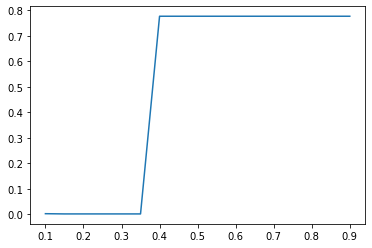

In [15]:
plt.plot(thresh_vals, res)

# After fitting the model let us obtain the prediction probabilities for the class BBB-

In [12]:
y_pred_proba = nn_model.predict(X_test)

49/49 [==============================] - 0s 3ms/step


In [13]:
y_pred_proba

array([[0.011851  ],
       [0.13203868],
       [0.01034161],
       ...,
       [0.00167868],
       [0.99830335],
       [0.7260381 ]], dtype=float32)

## To get the optimal threshold for the classification we compare the F-scores for several threshold values

In [15]:
def f_thresh(x, probs, y_true):
    yp = probs > x
    yp = yp.astype(int)
    f =  f1_score(y_true, yp)
    return f
thresh_vals = np.arange(0.1, 0.9, 0.01)
f_vals = [f_thresh(y, probs = y_pred_proba, y_true = y_test) for y in thresh_vals]

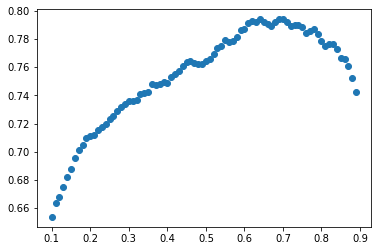

In [16]:
plt.scatter(x = thresh_vals, y=f_vals)
plt.show()

In [17]:
ind = f_vals.index(max(f_vals))

We see that the optimal threshold comes out to be 0.33 which is very close to the one obtained using Random Forest

In [18]:
opt_thresh = thresh_vals[ind]
print(opt_thresh)

0.6899999999999997


Using this threshold value we get the F-score on the test set to be around 0.80 and the accuracy to be around 0.856 which is lower than what we obtained using the Random Forest

In [19]:
y_pred = y_pred_proba > opt_thresh
print(confusion_matrix(y_pred = y_pred, y_true = y_test))
f1_score(y_true = y_test, y_pred = y_pred)

[[887 125]
 [103 440]]


0.7942238267148014

In [20]:
accuracy_score(y_true = y_test, y_pred = y_pred)

0.8533762057877814

Finally, the ROC is as follows

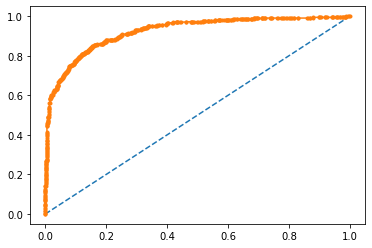

In [21]:
ns_probs = np.zeros(y_test.shape[0])
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(ns_fpr, ns_tpr, linestyle='--')
plt.plot(lr_fpr, lr_tpr, marker='.')

and the AUC is around 0.926

In [22]:
roc_auc_score(y_test, y_pred_proba)

0.9241805516126917